In [3]:
print("hi from ipad!")

hi from ipad!


In [4]:
import numpy as np
from pymoo.model.problem import Problem

In [11]:
# define problem by class
class MyProblem(Problem):

    def __init__(self):
        super().__init__(n_var=2,
                         n_obj=2,
                         n_constr=2,
                         xl=np.array([-2,-2]),
                         xu=np.array([2,2]))

    def _evaluate(self, X, out, *args, **kwargs):
        f1 = X[:,0]**2 + X[:,1]**2
        f2 = (X[:,0]-1)**2 + X[:,1]**2

        g1 = 2*(X[:, 0]-0.1) * (X[:, 0]-0.9) / 0.18
        g2 = - 20*(X[:, 0]-0.4) * (X[:, 0]-0.6) / 4.8

        out["F"] = np.column_stack([f1, f2])
        out["G"] = np.column_stack([g1, g2])
problem = MyProblem()

In [17]:
# initialize algorithm
from pymoo.algorithms.nsga2 import NSGA2
from pymoo.factory import get_sampling, get_crossover, get_mutation

algorithm = NSGA2(
    pop_size=50,
    n_offsprings=10,
    sampling=get_sampling("real_random"),
    crossover=get_crossover("real_sbx", prob=0.9, eta=15),
    mutation=get_mutation("real_pm", eta=20),
    eliminate_duplicates=True
)

In [18]:
# define termination criterion
from pymoo.factory import get_termination

termination = get_termination("n_gen", 50)

In [19]:
from pymoo.optimize import minimize

res = minimize(problem,
               algorithm,
               termination,
               seed=1,
               save_history=True,
               verbose=True)

n_gen |  n_eval |   cv (min)   |   cv (avg)   |  n_nds  |     eps      |  indicator  
    1 |     100 |  0.00000E+00 |  2.11633E+01 |       2 |            - |            -
    2 |     110 |  0.00000E+00 |  1.61114E+01 |       2 |  0.005331644 |        ideal
    3 |     120 |  0.00000E+00 |  1.11664E+01 |       2 |  0.00000E+00 |            f
    4 |     130 |  0.00000E+00 |  7.823294019 |       2 |  0.00000E+00 |            f
    5 |     140 |  0.00000E+00 |  5.245543749 |       2 |  0.00000E+00 |            f
    6 |     150 |  0.00000E+00 |  3.500112580 |       2 |  0.00000E+00 |            f
    7 |     160 |  0.00000E+00 |  2.073072246 |       5 |  0.205573203 |        ideal
    8 |     170 |  0.00000E+00 |  1.198056366 |       3 |  0.316071615 |        ideal
    9 |     180 |  0.00000E+00 |  0.538462162 |       3 |  0.00000E+00 |            f
   10 |     190 |  0.00000E+00 |  0.153077927 |       4 |  0.021440818 |            f
   11 |     200 |  0.00000E+00 |  0.035854005 |       

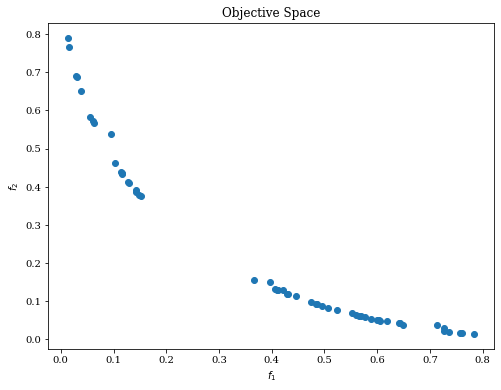

In [20]:
from pymoo.visualization.scatter import Scatter

# get the pareto-set and pareto-front for plotting
ps = problem.pareto_set(use_cache=False, flatten=False)
pf = problem.pareto_front(use_cache=False, flatten=False)

# Design Space
plot = Scatter(title = "Design Space", axis_labels="x")
plot.add(res.X, s=30, facecolors='none', edgecolors='r')
if ps is not None:
    plot.add(ps, plot_type="line", color="black", alpha=0.7)
plot.do()
plot.apply(lambda ax: ax.set_xlim(-0.5, 1.5))
plot.apply(lambda ax: ax.set_ylim(-2, 2))
plot.show()

# Objective Space
plot = Scatter(title = "Objective Space")
plot.add(res.F)
if pf is not None:
    plot.add(pf, plot_type="line", color="black", alpha=0.7)
plot.show()

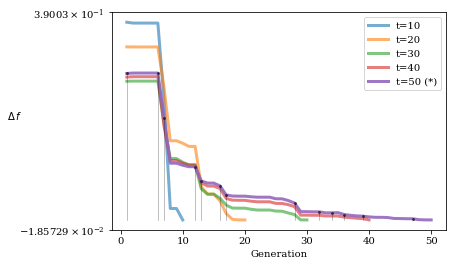

In [21]:
from pymoo.util.running_metric import RunningMetric

running = RunningMetric(delta_gen=10,
                        n_plots=5,
                        only_if_n_plots=True,
                        key_press=False,
                        do_show=True)

for algorithm in res.history:
    running.notify(algorithm)